In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
X = df.drop('sales', axis = 1)

In [6]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [7]:
y = df['sales']

In [8]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [9]:
polynomial_converter = PolynomialFeatures(degree = 2, include_bias=False)

In [10]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [11]:
poly_features = polynomial_converter.transform(X)
# Есть метод .fit_transform(X), чтобы сразу все сделать

In [12]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()

In [17]:
model.fit(X_train, y_train)

LinearRegression()

In [18]:
test_predictions = model.predict(X_test)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [20]:
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)

In [21]:
MAE

0.5475837919149621

In [22]:
MSE

0.4603062493888297

In [23]:
RMSE

0.6784587307926914

In [24]:
model.coef_

array([ 5.49298090e-02,  1.42197827e-02,  1.16916818e-02, -1.12988475e-04,
        1.08937883e-03, -1.01342723e-04,  2.76385341e-04,  1.44165732e-04,
        8.99438936e-05])

In [26]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1, 10):
    
    polynomial_features = PolynomialFeatures(degree = d, include_bias = False)
    polynomial_converter = polynomial_features.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(polynomial_converter, y, test_size=0.33, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_errors.append(rmse_train)
    test_rmse_errors.append(rmse_test)

In [27]:
train_rmse_errors

[1.5526939990087727,
 0.6057702019226606,
 0.47568472931843403,
 0.3742987908933726,
 0.24108761115287888,
 0.19391827160920758,
 3.57143206981784,
 0.12466500014139997,
 0.12081409929085078]

In [28]:
test_rmse_errors

[1.9307843822347188,
 0.6784587307926914,
 0.5148267621788772,
 1.2750589684272602,
 6.41072112878746,
 24.710203797747432,
 549.9827475326982,
 9158.912248332208,
 183513.46506781032]

In [30]:
import matplotlib.pyplot as plt

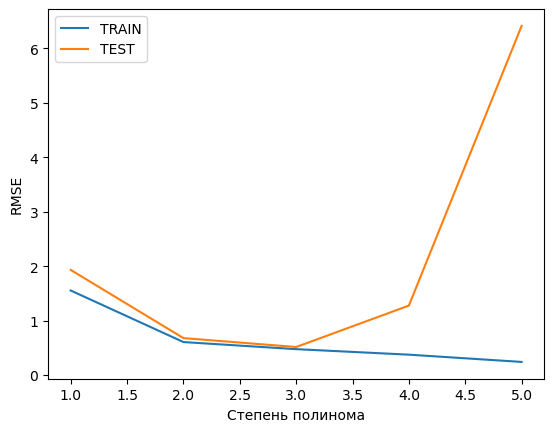

In [32]:
plt.plot(range(1, 6), train_rmse_errors[:5], label = 'TRAIN')
plt.plot(range(1, 6), test_rmse_errors[:5], label = 'TEST')
plt.xlabel('Степень полинома')
plt.ylabel('RMSE')
plt.legend()

In [33]:
# Выбираем степень полинома 3

In [35]:
polynomial_features = PolynomialFeatures(degree = 3, include_bias = False)
final_converter = polynomial_features.fit_transform(X)

In [36]:
final_model = LinearRegression()

In [45]:
final_model.fit(final_converter, y)
# Уже на всех данных X, так как проанализировали, что это лучший вариант

LinearRegression()

In [46]:
campaign = [[149, 22, 12]] 

In [47]:
camp_convert = polynomial_features.fit_transform(campaign)

In [50]:
final_model.predict(camp_convert)

array([14.64501014])